In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from tensorflow import keras
import seaborn as sns
import random
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
current_dir = os.getcwd()
print(current_dir)


/content


ACRIMA glaucoma images:


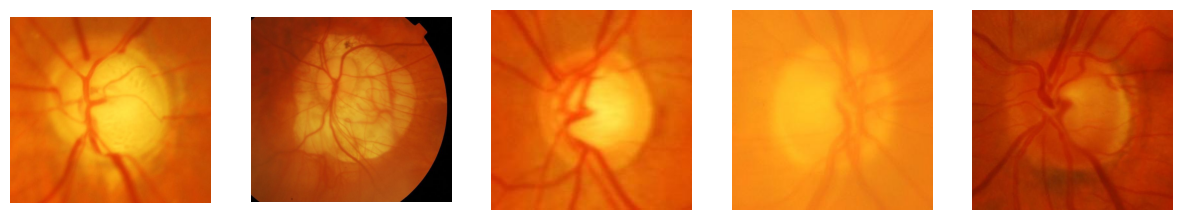

ACRIMA normal images:


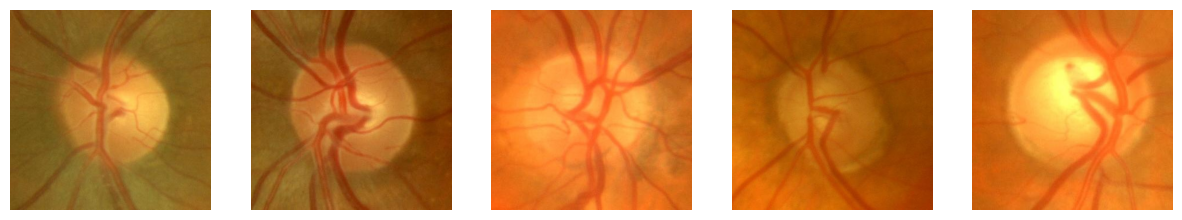

In [ ]:
print("ACRIMA glaucoma images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 10))
for i, ax in enumerate(axs):
    img_path = os.path.join(ACRIMA_TRAIN_GLAUCOMA, acrima_glaucoma_images[i])
    ax.imshow(load_img(img_path))
    ax.axis("off")  # Turn off the axes
plt.show()

# Plotting normal images
print("ACRIMA normal images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 10))
for i, ax in enumerate(axs):
    img_path = os.path.join(ACRIMA_TRAIN_NORMAL, acrima_normal_images[i])
    ax.imshow(load_img(img_path))
    ax.axis("off")  # Turn off the axes
plt.show()

DRISTHI glaucoma images:


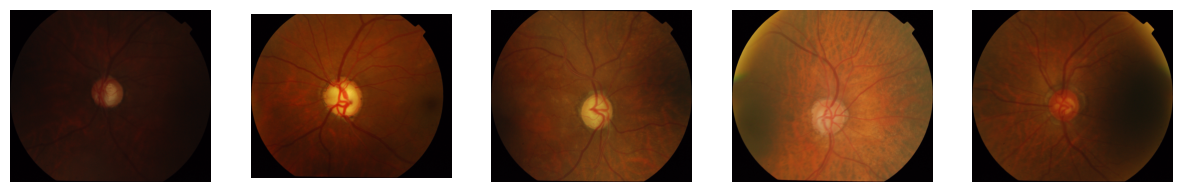

DRISTHI normal images:


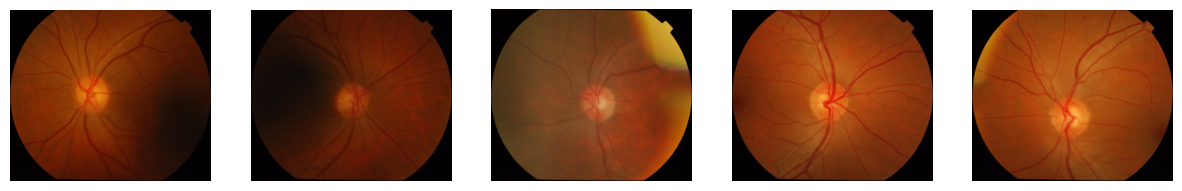

In [ ]:
print("DRISTHI glaucoma images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 10))
for i, ax in enumerate(axs):
    img_path = os.path.join(DRISHTI_GS_TRAIN_GLAUCOMA, dristhi_glaucoma_images[i])
    ax.imshow(load_img(img_path))
    ax.axis("off")  # Turn off the axes
plt.show()

# Plotting normal images
print("DRISTHI normal images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 10))
for i, ax in enumerate(axs):
    img_path = os.path.join(DRISHTI_GS_TRAIN_NORMAL, dristhi_normal_images[i])
    ax.imshow(load_img(img_path))
    ax.axis("off")  # Turn off the axes
plt.show()

RIM glaucoma images:


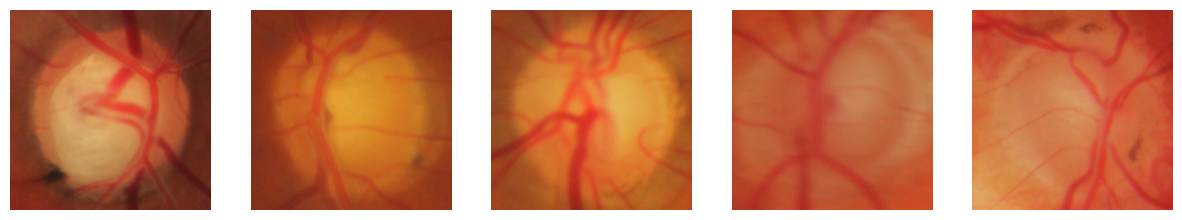

RIM normal images:


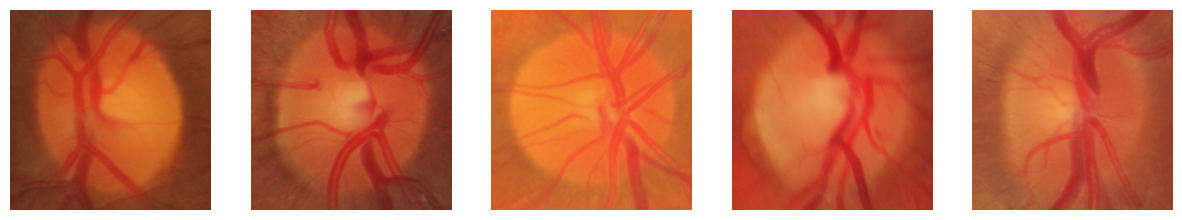

In [ ]:
print("RIM glaucoma images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 10))
for i, ax in enumerate(axs):
    img_path = os.path.join(RIM_ONE_TRAIN_GLAUCOMA, rim_one_glaucoma_images[i])
    ax.imshow(load_img(img_path))
    ax.axis("off")  # Turn off the axes
plt.show()

# Plotting normal images
print("RIM normal images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 10))
for i, ax in enumerate(axs):
    img_path = os.path.join(RIM_ONE_TRAIN_NORMAL, rim_one_normal_images[i])
    ax.imshow(load_img(img_path))
    ax.axis("off")  # Turn off the axes
plt.show()

In [ ]:
import os
import shutil
import pathlib
!pip install split-folders
import splitfolders
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Create the base directory for the combined dataset
base_dir = '/content/drive/MyDrive/FYP/combine'
os.makedirs(base_dir, exist_ok=True)

In [ ]:
# Define paths for glaucoma and normal images
glaucoma_paths = [
    '/content/drive/MyDrive/FYP/dataset/DRISHTI-GS/DRISHTI-GS/Testing/glaucoma',
    '/content/drive/MyDrive/FYP/dataset/DRISHTI-GS/DRISHTI-GS/Training/glaucoma',
    '/content/drive/MyDrive/FYP/dataset/ACRIMA/PARTITIONED/Testing/glaucoma',
    '/content/drive/MyDrive/FYP/dataset/ACRIMA/PARTITIONED/Training/glaucoma',
    '/content/drive/MyDrive/FYP/dataset/RIM-ONE/PARTITIONED/Testing/glaucoma',
    '/content/drive/MyDrive/FYP/dataset/RIM-ONE/PARTITIONED/Training/glaucoma'


]
normal_paths = [
    '/content/drive/MyDrive/FYP/dataset/DRISHTI-GS/DRISHTI-GS/Testing/normal',
    '/content/drive/MyDrive/FYP/dataset/DRISHTI-GS/DRISHTI-GS/Training/normal',
    '/content/drive/MyDrive/FYP/dataset/ACRIMA/PARTITIONED/Testing/normal',
    '/content/drive/MyDrive/FYP/dataset/ACRIMA/PARTITIONED/Training/normal',
    '/content/drive/MyDrive/FYP/dataset/RIM-ONE/PARTITIONED/Testing/normal',
    '/content/drive/MyDrive/FYP/dataset/RIM-ONE/PARTITIONED/Training/normal'

]

# Define destination directories for glaucoma and normal
glaucoma_dest = os.path.join(base_dir, 'glaucoma')
normal_dest = os.path.join(base_dir, 'normal')
os.makedirs(glaucoma_dest, exist_ok=True)
os.makedirs(normal_dest, exist_ok=True)

In [ ]:
# Function to copy images from source paths to destination
def copy_images(source_paths, destination):
    for path in source_paths:
        if not os.path.exists(path):
            print(f"Warning: Path does not exist: {path}")
            continue
        shutil.copytree(path, destination, dirs_exist_ok=True)

# Copy images for glaucoma and normal classes
print("Copying glaucoma images...")
copy_images(glaucoma_paths, glaucoma_dest)
print("Copying normal images...")
copy_images(normal_paths, normal_dest)

Copying glaucoma images...
Copying normal images...


In [ ]:
# Verify the number of images in each class
glaucoma_images = [fn for fn in os.listdir(glaucoma_dest) if os.path.isfile(os.path.join(glaucoma_dest, fn))]
normal_images = [fn for fn in os.listdir(normal_dest) if os.path.isfile(os.path.join(normal_dest, fn))]
print(f"Total glaucoma images: {len(glaucoma_images)}")
print(f"Total normal images: {len(normal_images)}")

Total glaucoma images: 638
Total normal images: 653


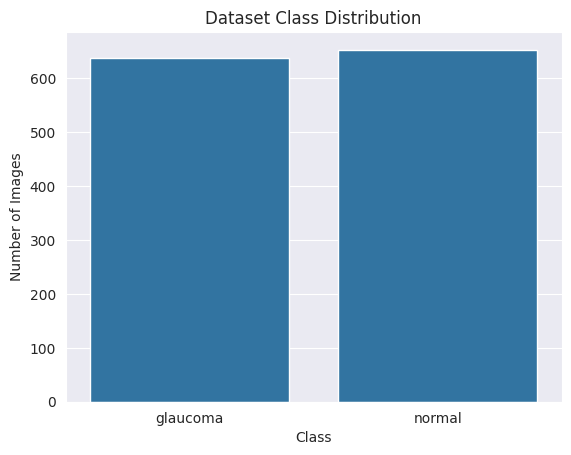

In [ ]:

# Dataset statistics
dataset_classes = ['glaucoma', 'normal']
data_counts = [len(glaucoma_images), len(normal_images)]
# Plot statistics
sns.set_style('darkgrid')
sns.barplot(x=dataset_classes, y=data_counts)
plt.title('Dataset Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

In [ ]:
base_dir = '/content/drive/MyDrive/FYP/combine'
# Split the combined dataset into train, validation, and test sets
print("Splitting the dataset...")
splitfolders.ratio(
    base_dir,
    output='/content/drive/MyDrive/FYP/split',
    seed=1337,
    ratio=(0.8, 0.1, 0.1),
    group_prefix=None
)

print("Dataset split completed.")


In [ ]:
# Check the split directories
train_glaucoma = '/content/drive/MyDrive/FYP/split/train/glaucoma'
train_normal = '/content/drive/MyDrive/FYP/split/train/normal'
val_glaucoma = '/content/drive/MyDrive/FYP/split/val/glaucoma'
val_normal = '/content/drive/MyDrive/FYP/split/val/normal'
test_glaucoma = '/content/drive/MyDrive/FYP/split/test/glaucoma'
test_normal = '/content/drive/MyDrive/FYP/split/test/normal'

# List and print the number of files in each split folder
print(f"Train Glaucoma: {len(os.listdir(train_glaucoma))} images")
print(f"Train Normal: {len(os.listdir(train_normal))} images")
print(f"Validation Glaucoma: {len(os.listdir(val_glaucoma))} images")
print(f"Validation Normal: {len(os.listdir(val_normal))} images")
print(f"Test Glaucoma: {len(os.listdir(test_glaucoma))} images")
print(f"Test Normal: {len(os.listdir(test_normal))} images")

Train Glaucoma: 510 images
Train Normal: 522 images
Validation Glaucoma: 63 images
Validation Normal: 65 images
Test Glaucoma: 65 images
Test Normal: 66 images


In [ ]:
# Image dimensions & batch size
img_height = 256
img_width = 256
batch_size = 32

def apply_clahe_on_v(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(image_hsv)

    # Ensure V channel is uint8 before applying CLAHE
    v = v.astype(np.uint8)

    # Apply CLAHE on the V channel
    clahe = cv2.createCLAHE(clipLimit=5)
    v_clahe = clahe.apply(v)

    # Convert v_clahe back to the same type as h and s
    v_clahe = v_clahe.astype(h.dtype)

    # Ensure all channels have the same shape
    if v_clahe.shape != h.shape:
        v_clahe = cv2.resize(v_clahe, (h.shape[1], h.shape[0]))

    # Merge back and convert to BGR
    image_hsv_clahe = cv2.merge((h, s, v_clahe))
    final_image = cv2.cvtColor(image_hsv_clahe, cv2.COLOR_HSV2BGR)

    # Convert to float32 and scale between [0,1]
    final_image = final_image.astype(np.float32) / 255.0

    return final_image

# Custom preprocessing function
def custom_preprocessing(image):
    image_np = np.array(image)
    image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)  # Convert to OpenCV format
    processed_img = apply_clahe_on_v(image_np)
    processed_img = cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB)  # Convert back to RGB
    return processed_img

# **Train Generator (With Augmentation)**
train_datagen = ImageDataGenerator(

    preprocessing_function=custom_preprocessing,  # Apply CLAHE
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True
)

# **Validation Generator (No Augmentation, Only CLAHE)**
val_datagen = ImageDataGenerator(

    preprocessing_function=custom_preprocessing  # Only CLAHE, no augmentations
)

# **Test Generator (No Augmentation, Only CLAHE)**
test_datagen = ImageDataGenerator(

    preprocessing_function=custom_preprocessing  # Only CLAHE, no augmentations
)

# Load Training Data
train_ds = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/FYP/split/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Load Validation Data
val_ds = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/FYP/split/val',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load Test Data
test_ds = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/FYP/split/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1032 images belonging to 2 classes.
Found 128 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
# Load the pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional base
base_model.trainable = False

# Add custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout layer for regularization
x = Dense(2, activation='sigmoid')(x)  # Binary classifier with sigmoid activation

# Define the model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 18,909,378 (72.13 MB)

 Trainable params: 4,194,690 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


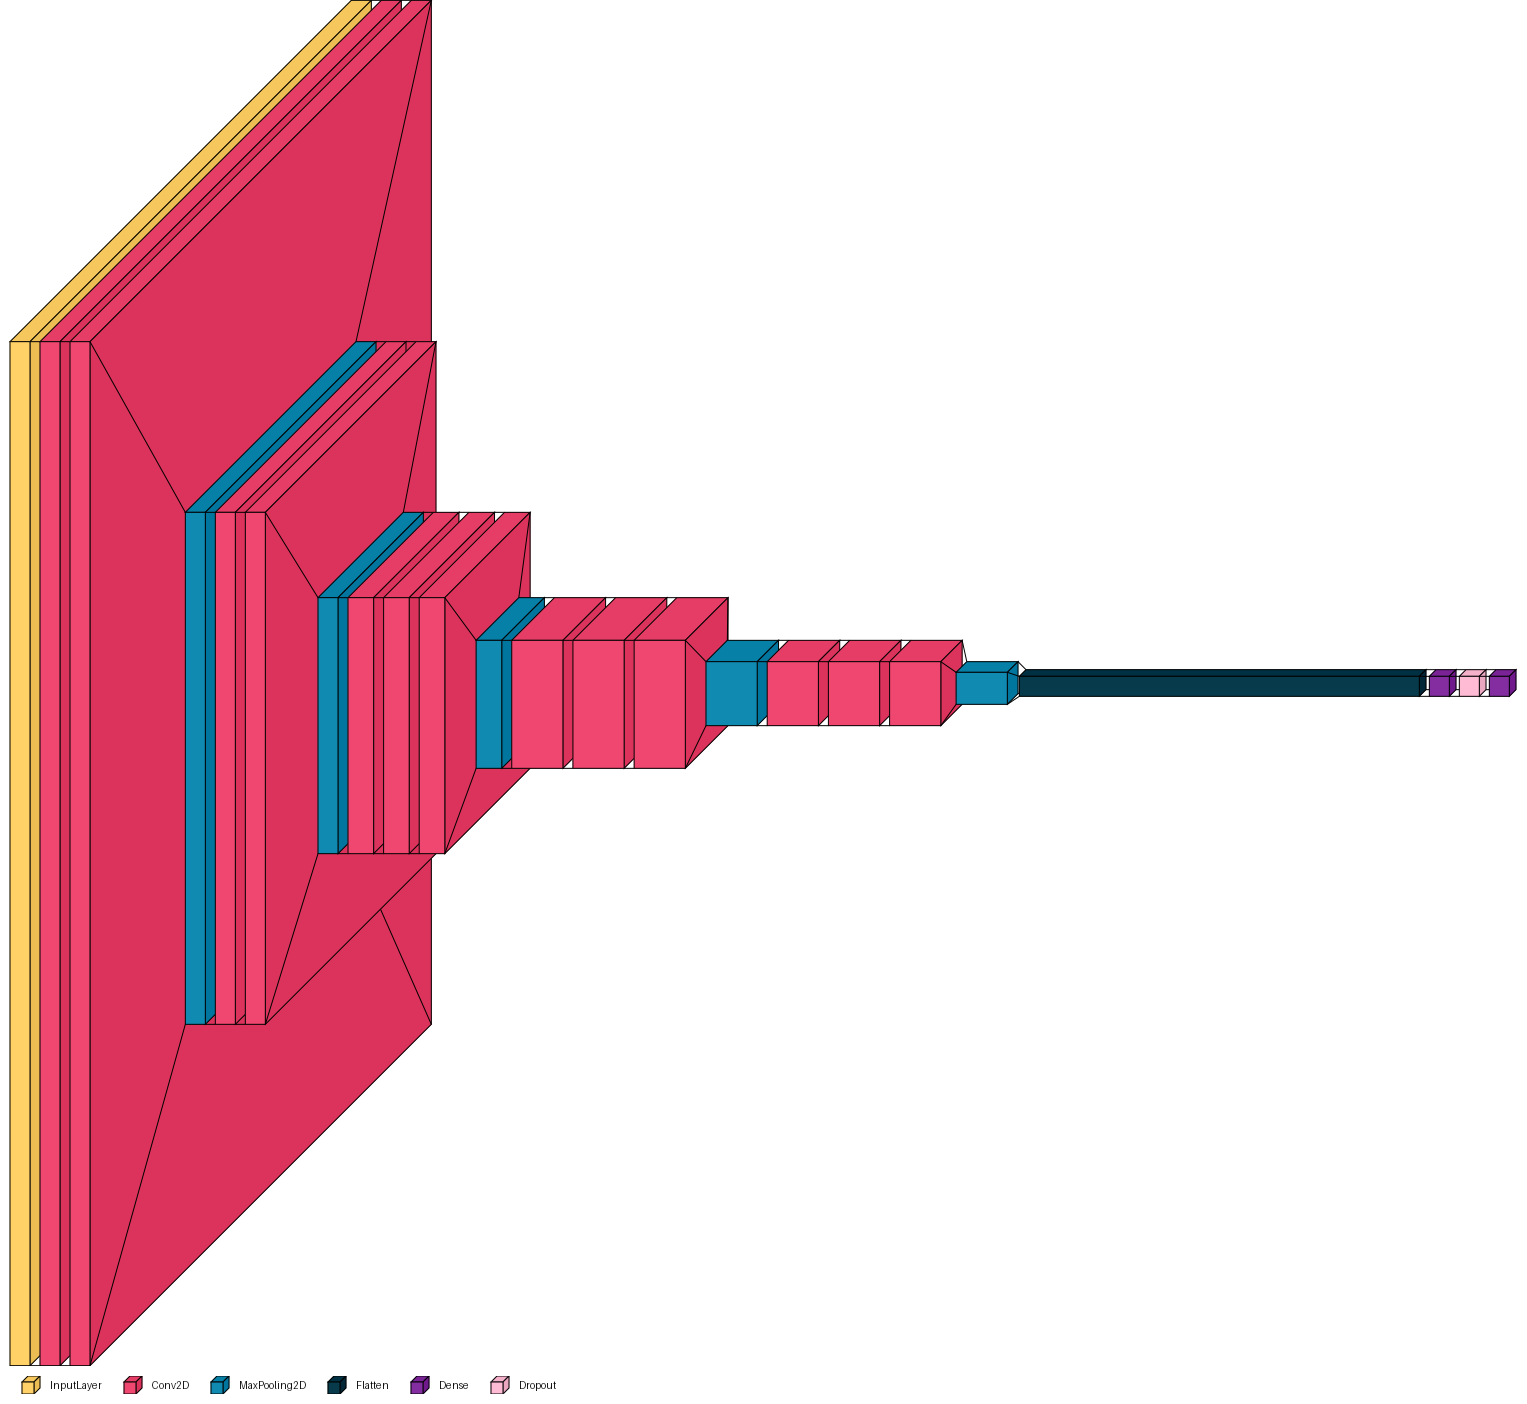

In [ ]:
!pip install visualkeras
import visualkeras
from PIL import ImageFont

# Optional: Load a font (adjust path for Colab if needed)
# try:
#     font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", 20)
# except OSError:
#     font = None

# Visualize the model
image = visualkeras.layered_view(
    model,
    legend=True,
    to_file="model_visualization.png"  # Save visualization to file
)

# Display the visualization in Colab
from IPython.display import Image
Image("model_visualization.png")


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(
    train_ds,
    epochs=100,  # Max epochs, but training may stop earlier
    validation_data=val_ds,
    callbacks = [early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 657s 19s/step - accuracy: 0.5604 - loss: 0.7278 - val_accuracy: 0.7109 - val_loss: 0.5647
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7108 - loss: 0.5877 - val_accuracy: 0.7578 - val_loss: 0.5073
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7531 - loss: 0.5385 - val_accuracy: 0.8125 - val_loss: 0.4773
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7665 - loss: 0.5108 - val_accuracy: 0.7656 - val_loss: 0.4503
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7705 - loss: 0.4717 - val_accuracy: 0.8125 - val_loss: 0.4185
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8132 - loss: 0.4353 - val_accuracy: 0.8438 - val_loss: 0.4010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7766 - loss: 0.4817 - val_accuracy: 0.8594 - val_loss: 0.3917
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8264 - loss: 0.4107 - val_accuracy: 0.8359 -

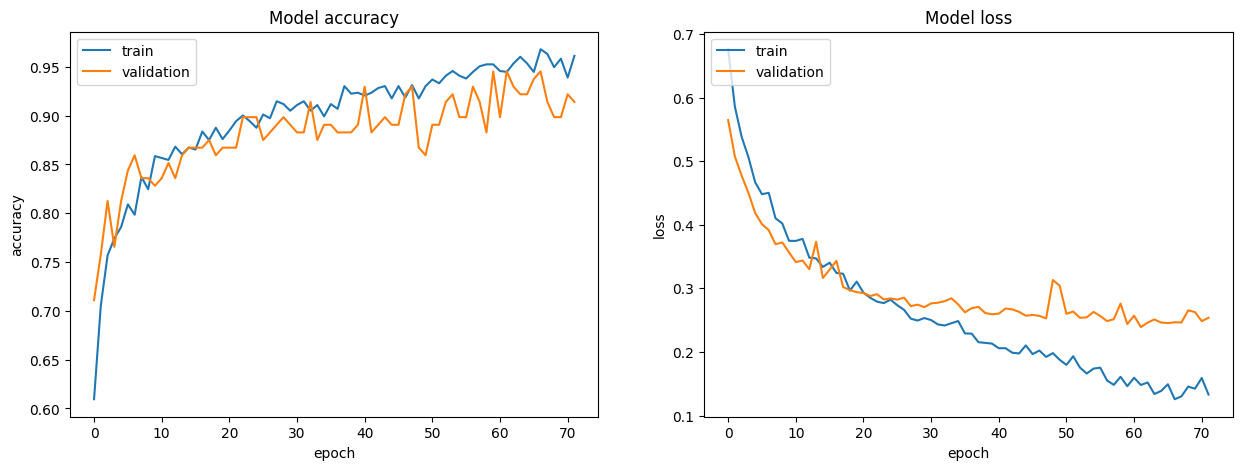

In [ ]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_train_history(history)

In [ ]:
score=model.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 74s 18s/step - accuracy: 0.8604 - loss: 0.3153
Loss: 0.3303377032279968 Accuracy: 0.8625954389572144


In [ ]:
model.save('/content/drive/MyDrive/FYP/combine_model/vgg/VggClahe1.h5')
model.save('/content/drive/MyDrive/FYP/combine_model/vgg/VggClahe1.keras')

In [ ]:

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sb
import pandas as pd

In [ ]:
model=load_model('/content/drive/MyDrive/FYP/combine_model/vgg/VggClahe1.keras')
print("Glaucoma detection model loaded")

Glaucoma detection model loaded


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
pred= np.round(model.predict(test_ds, verbose=1))
test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 610ms/step
[[53  6]
 [12 60]]


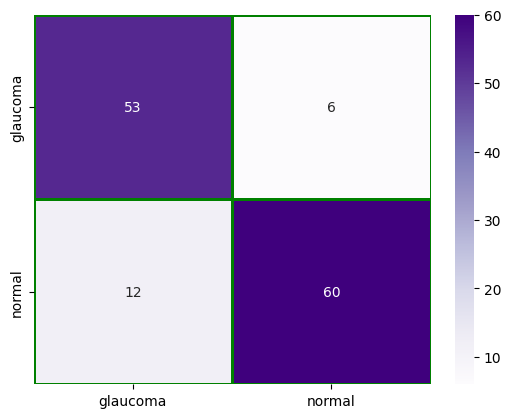

In [ ]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['glaucoma','normal'],yticklabels=['glaucoma','normal'],linewidths=1,
                linecolor='green').plot()
plt.show()

In [ ]:
test_report = classification_report(test_ds.labels,test_pred_labels, target_names=['glaucoma','normal'], output_dict=True)
test_df = pd.DataFrame(test_report).transpose()
test_df

,precision,recall,f1-score,support
glaucoma,0.898305,0.815385,0.854839,65.000000
normal,0.833333,0.909091,0.869565,66.000000
accuracy,0.862595,0.862595,0.862595,0.862595
macro avg,0.865819,0.862238,0.862202,131.000000
weighted avg,0.865571,0.862595,0.862258,131.000000
